<a href="https://colab.research.google.com/github/plaban1981/POCs/blob/main/OCR_on_PDF_files_using_Python_tesseract_pyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installing Tesseract

In [2]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,170 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../tesserac

## Installing PyOCR
Now we need to install the Python bindings for tesseract. Fortunately, there are some pretty nice bindings out there. We will be installing a latest one:

In [5]:
! pip install git+https://gitlab.gnome.org/World/OpenPaperwork/pyocr.git

  Cloning https://gitlab.gnome.org/World/OpenPaperwork/pyocr.git to /tmp/pip-req-build-lqo6dgow
  Running command git clone -q https://gitlab.gnome.org/World/OpenPaperwork/pyocr.git /tmp/pip-req-build-lqo6dgow
  Created wheel for pyocr: filename=pyocr-0.9.dev5+g79d2fcc-py3-none-any.whl size=37219 sha256=f68c51256e09a6d31f9f13355fd01028a6d404769bedc4b76bcced9d492a6d76
  Stored in directory: /tmp/pip-ephem-wheel-cache-q9arp_0_/wheels/31/5b/d3/013bc7fd8df76465db678b9bc3547aa3aa4aa8f244fba34d6f
Successfully built pyocr


## Installing Wand and PIL
We need to install two other dependencies as well before we can move on. First one is Wand. It is the Python bindings for Imagemagick. We will be using it for converting PDF files to images:

In [21]:
! pip install ghostscript==0.6

In [8]:
! apt-get install libmagickwand-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagickcore-6-arch-config libmagickcore-6-headers
  libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra libmagickcore-6.q16-dev
  libmagickwand-6-headers libmagickwand-6.q16-3 libmagickwand-6.q16-dev
  libpixman-1-dev librsvg2-dev libwmf-dev libwmf0.2-7 libxcb-shm0-dev
  poppler-data
Suggested packages:
  fonts-noto ghostscript-x libcairo2-doc inkscape libjxr-tools librsvg2-doc
  libwmf-doc libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts

In [6]:
! pip install wand

     |████████████████████████████████| 139 kB 5.2 MB/s 


## Import libraries

In [1]:
from wand.image import Image
from PIL import Image 
import pyocr
import pyocr.builders
import io

## We need to get the handle of the OCR library (in our case, tesseract) and the language which will be used by pyocr.

In [2]:
tool = pyocr.get_available_tools()[0]
lang = tool.get_available_languages()[0] # Choose english as the language

In [3]:
tool

<module 'pyocr.tesseract' from '/usr/local/lib/python3.7/dist-packages/pyocr/tesseract.py'>

In [4]:
lang

'eng'

## Now we need to setup two lists which will be used to hold our images and final_text.

In [5]:
req_image = []
final_text = []

## open the PDF file using wand and convert it to jpeg

In [17]:
from google.colab import files
files.upload()

Saving new_pdf_4.pdf to new_pdf_4.pdf


{'new_pdf_4.pdf': b'%PDF-1.3\n1 0 obj\n<<\n/Type /Pages\n/Count 1\n/Kids [ 3 0 R ]\n>>\nendobj\n2 0 obj\n<<\n/Producer (PyPDF2)\n>>\nendobj\n3 0 obj\n<<\n/ArtBox [ 0 0 311.811 566.929 ]\n/BleedBox [ 0 0 311.811 566.929 ]\n/Contents 5 0 R\n/CropBox [ 0 0 311.811 566.929 ]\n/Group 6 0 R\n/MediaBox [ 0 0 311.811 566.929 ]\n/Parent 1 0 R\n/Resources <<\n/ExtGState <<\n/GS0 7 0 R\n/GS1 8 0 R\n/GS2 9 0 R\n>>\n/Font <<\n/C0_0 10 0 R\n/C0_1 18 0 R\n/T1_0 26 0 R\n/T1_1 31 0 R\n>>\n/ProcSet [ /PDF /Text ]\n/XObject <<\n/Fm0 35 0 R\n/Fm1 36 0 R\n>>\n>>\n/Rotate 0\n/StructParents 3\n/TrimBox [ 0 0 311.811 566.929 ]\n/Type /Page\n>>\nendobj\n4 0 obj\n<<\n/Type /Catalog\n/Pages 1 0 R\n>>\nendobj\n5 0 obj\n<<\n/Filter /FlateDecode\n/Length 4994\n>>\nstream\nH\x89\x94Wko\xdb\xb8\x12\xfd\xee_\xc1O\x0b\x12hdR\xd4sQ\x14h\x1e\xdbm\xb6\xc1\xdd\xdb\xf8\xc3\x02\xcdbA\xdb\x8c\xa3V\x96\\Kn\x9a\xc5\xfd\xf1w\x86\x94d\xc9\x0fIA\x81\xda15s\xe6\x9cyQ\xdf\'\xd3\x0f\xf7\x9c\xac\x8a\xc9\xf4\xb75\'\xd7\xf9\xe4\xbf\x93\

In [7]:
!sudo rm /etc/ImageMagick-6/policy.xml

rm: cannot remove '/etc/ImageMagick-6/policy.xml': No such file or directory


## Convert PDF to Image using Python

In [14]:
!pip install pdf2image

In [23]:
!apt-get install poppler-utils 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (255 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 156976 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [32]:
#PDF TO IMAGE CONVERSION
#IMPORT LIBRARIES
import pdf2image
from PIL import Image
import time

#DECLARE CONSTANTS
PDF_PATH = "/content/drive/MyDrive/ZeoanAI_Poc/4Q19-Press-Release.pdf"
DPI = 600
OUTPUT_FOLDER = None
FIRST_PAGE = None
LAST_PAGE = None
FORMAT = 'jpg'
THREAD_COUNT = 1
USERPWD = None
USE_CROPBOX = False
STRICT = False

def pdftopil():
    #This method reads a pdf and converts it into a sequence of images
    #PDF_PATH sets the path to the PDF file
    #dpi parameter assists in adjusting the resolution of the image
    #output_folder parameter sets the path to the folder to which the PIL images can be stored (optional)
    #first_page parameter allows you to set a first page to be processed by pdftoppm 
    #last_page parameter allows you to set a last page to be processed by pdftoppm
    #fmt parameter allows to set the format of pdftoppm conversion (PpmImageFile, TIFF)
    #thread_count parameter allows you to set how many thread will be used for conversion.
    #userpw parameter allows you to set a password to unlock the converted PDF
    #use_cropbox parameter allows you to use the crop box instead of the media box when converting
    #strict parameter allows you to catch pdftoppm syntax error with a custom type PDFSyntaxError

    start_time = time.time()
    pil_images = pdf2image.convert_from_path(PDF_PATH, dpi=DPI, output_folder=OUTPUT_FOLDER, first_page=FIRST_PAGE, last_page=LAST_PAGE, fmt=FORMAT, thread_count=THREAD_COUNT, userpw=USERPWD, use_cropbox=USE_CROPBOX, strict=STRICT)
    print ("Time taken : " + str(time.time() - start_time))
    return pil_images
    
def save_images(pil_images):
    #This method helps in converting the images in PIL Image file format to the required image format
    index = 1
    for image in pil_images:
        image.save("page_" + str(index) + ".jpg")
        index += 1

if __name__ == "__main__":
    pil_images = pdftopil()
    save_images(pil_images)


Time taken : 5.667551517486572


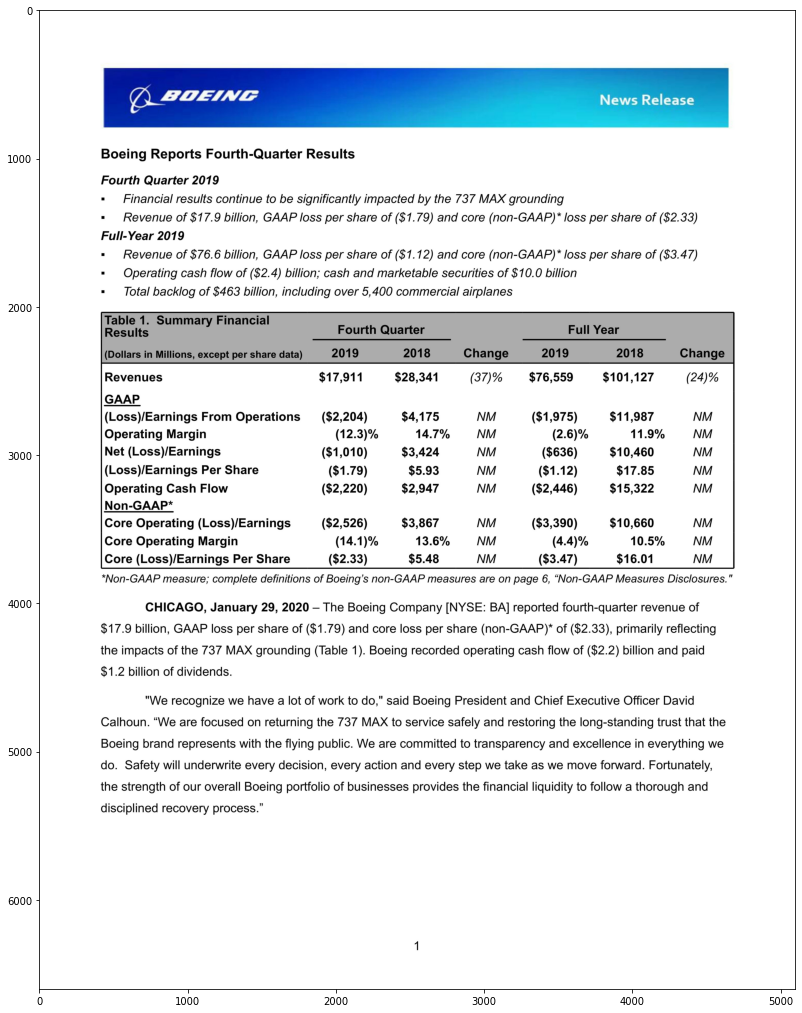

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
plt.imshow(Image.open('/content/page_1.jpg'))
plt.show()

In [52]:
start_time = time.time()
txt = tool.image_to_string(
    Image.open('/content/page_1.jpg'),
    lang=lang,
    builder=pyocr.builders.TextBuilder()
)
print ("Time taken : " + str(time.time() - start_time))

Time taken : 7.91247034072876


In [53]:
print(txt)

Oaks News Release

 

Boeing Reports Fourth-Quarter Results

Fourth Quarter 2019

= Financial results continue to be significantly impacted by the 737 MAX grounding

= Revenue of $17.9 billion, GAAP loss per share of ($1.79) and core (non-GAAP)* loss per share of ($2.33)
Full-Year 2019

= Revenue of $76.6 billion, GAAP loss per share of ($1.12) and core (non-GAAP)* loss per share of ($3.47)
= Operating cash flow of ($2.4) billion; cash and marketable securities of $10.0 billion

= Total backlog of $463 billion, including over 5,400 commercial airplanes

Table 1. Summary Financial
Results Fourth Quarter Full Year

(Dollars in Millions, except per share data) 2019 2018 Change 2019 2018

Revenues $17,911 $28,341 (37)% $76,559 $101,127 (24)%

GAAP

(Loss)/Earnings From Operations ($2,204) $4,175 NM ($1,975) $11,987 NM
Operating Margin (12.3)% 14.7% NM (2.6)% 11.9% NM
Net (Loss)/Earnings ($1,010) $3,424 NM ($636) $10,460 NM
(Loss)/Earnings Per Share ($1.79) $5.93 NM ($1.12) $17.85 NM
Operat

In [37]:
txt.split("\n")

['Oaks News Release',
 '',
 ' ',
 '',
 'Boeing Reports Fourth-Quarter Results',
 '',
 'Fourth Quarter 2019',
 '',
 '= Financial results continue to be significantly impacted by the 737 MAX grounding',
 '',
 '= Revenue of $17.9 billion, GAAP loss per share of ($1.79) and core (non-GAAP)* loss per share of ($2.33)',
 'Full-Year 2019',
 '',
 '= Revenue of $76.6 billion, GAAP loss per share of ($1.12) and core (non-GAAP)* loss per share of ($3.47)',
 '= Operating cash flow of ($2.4) billion; cash and marketable securities of $10.0 billion',
 '',
 '= Total backlog of $463 billion, including over 5,400 commercial airplanes',
 '',
 'Table 1. Summary Financial',
 'Results Fourth Quarter Full Year',
 '',
 '(Dollars in Millions, except per share data) 2019 2018 Change 2019 2018',
 '',
 'Revenues $17,911 $28,341 (37)% $76,559 $101,127 (24)%',
 '',
 'GAAP',
 '',
 '(Loss)/Earnings From Operations ($2,204) $4,175 NM ($1,975) $11,987 NM',
 'Operating Margin (12.3)% 14.7% NM (2.6)% 11.9% NM',
 'Net (L

In [49]:
import codecs
start_time = time.time()
builder = pyocr.builders.TextBuilder()
txt = tool.image_to_string(
    Image.open('/content/page_3.jpg'),
    lang=lang,
    builder=pyocr.builders.TextBuilder()
)
print ("Time taken : " + str(time.time() - start_time))
with codecs.open("toto.txt", 'w', encoding='utf-8') as file_descriptor:
    builder.write_file(file_descriptor, txt)
# toto.txt is a simple text file, encoded in utf-8


Time taken : 6.777601003646851


In [51]:
#builder = pyocr.builders.TextBuilder()
with codecs.open("toto.txt", 'r', encoding='utf-8') as file_descriptor:
    txt = builder.read_file(file_descriptor)
    print(txt)
# txt is a Python string


Segment Results

Commercial Airplanes

Table 4. Commercial Airplanes Fourth Quarter Full Year
(Dollars in Millions) 2019 2018 Change 2019 2018 Change

Commercial Airplanes Deliveries 79 238 (67)% 380 806 (53)%

Revenues $7,462 $16,531 (55)% $32,255 $57,499 (44)%
(Loss)/Earnings from Operations ($2,844) $2,600 NM ($6,657) $7,830 NM
Operating Margin (38.1)% 15.7% NM (20.6)% 13.6% NM

 

Commercial Airplanes fourth-quarter revenue was $7.5 billion and fourth-quarter operating margin
decreased to (38.1) percent reflecting lower 737 deliveries and an additional pre-tax charge of $2.6 billion related to
estimated potential concessions and other considerations to customers related to the 737 MAX grounding (Table 4).
The estimated costs to produce 737 aircraft included in the accounting quantity increased by $2.6 billion during the
quarter, primarily to reflect updated production and delivery assumptions. In addition, the suspension of 737 MAX
production and a gradual resumption of production 

In [43]:
word_boxes = tool.image_to_string(
    Image.open('/content/page_1.jpg'),
    lang="eng",
    builder=pyocr.builders.WordBoxBuilder()
)


In [19]:
txt = tool.image_to_string(
    Image.open('/content/drive/MyDrive/ZeoanAI_Poc/Benchmarking Table.jpeg'),
    lang=lang,
    builder=pyocr.builders.LineBoxBuilder())
